#다층 퍼셉트론으로 손글씨 분류하기

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt # 시각화를 위한 맷플롯립
from sklearn.datasets import load_digits
digits = load_digits() # 1,979개의 이미지 데이터 로드

In [2]:
#이미지를 행렬로 출력하는 방법.
#첫번째 이미지를 출력햊보기
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


하나의 이미지가 8x8 차원임을 알 수 있다

In [3]:
#위 그림이 무엇을 나타내는지 알아보기
print(digits.target[0])

0


In [4]:
print("전체 샘플의 수 : {}".format(len(digits.images)))

전체 샘플의 수 : 1797


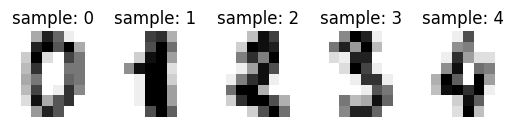

In [7]:
images_labels = list(zip(digits.images, digits.target))
for idx, (image, label) in enumerate(images_labels[:5]):
  plt.subplot(2, 5, idx + 1)
  plt.axis('off')
  plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
  plt.title('sample: %i' % label)

In [8]:
for i in range(5):
  print(i,'번 인덱스 샘플의 레이블 : ',digits.target[i])

0 번 인덱스 샘플의 레이블 :  0
1 번 인덱스 샘플의 레이블 :  1
2 번 인덱스 샘플의 레이블 :  2
3 번 인덱스 샘플의 레이블 :  3
4 번 인덱스 샘플의 레이블 :  4


input(하나의 이미지)을 8x8 행렬로 하지 말고 1*64로 하자 (feature가 64개).

In [10]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [13]:
X = digits.data
Y = digits.target

In [17]:
import torch
import torch.nn as nn
from torch import optim

In [20]:
#심층망 모델 만들기
model = nn.Sequential(
    nn.Linear(64,32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16,10)
)

In [21]:
X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.int64)

<ipython-input-21-ec09ccdb9262>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, dtype=torch.float32)
<ipython-input-21-ec09ccdb9262>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y = torch.tensor(Y, dtype=torch.int64)


In [22]:
cost_function = nn.CrossEntropyLoss()

In [23]:
optimizer = optim.Adam(model.parameters())

In [24]:
losses = []

In [25]:
for epoch in range(100):
  optimizer.zero_grad()
  y_pred = model(X)

  cost = cost_function(y_pred, Y)
  cost.backward()
  optimizer.step()

  if epoch % 10 ==0:
     print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, 100, cost.item()
        ))
  losses.append(cost.item())

Epoch    0/100 Cost: 2.383281
Epoch   10/100 Cost: 2.001061
Epoch   20/100 Cost: 1.703019
Epoch   30/100 Cost: 1.419419
Epoch   40/100 Cost: 1.126882
Epoch   50/100 Cost: 0.840265
Epoch   60/100 Cost: 0.613485
Epoch   70/100 Cost: 0.452978
Epoch   80/100 Cost: 0.346640
Epoch   90/100 Cost: 0.277675


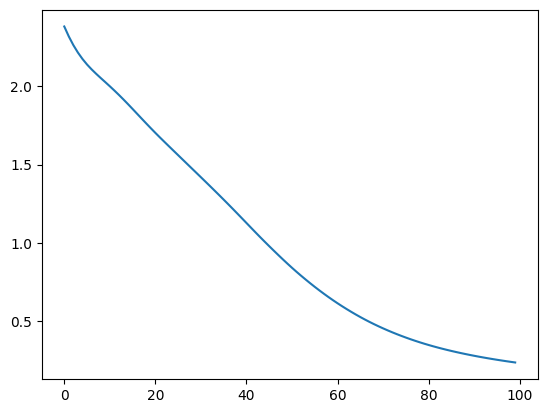

In [26]:
plt.plot(losses)